# Домашнее задание

Математический анализ
69 баллов

**Задача 1** (14 баллов)

Найдите экстремумы функции:

$$
f(x, y, z)=2 x^3+2 x y+2 x z+y^2+z^2+2 y-8 .
$$

Распишите подробное решение.

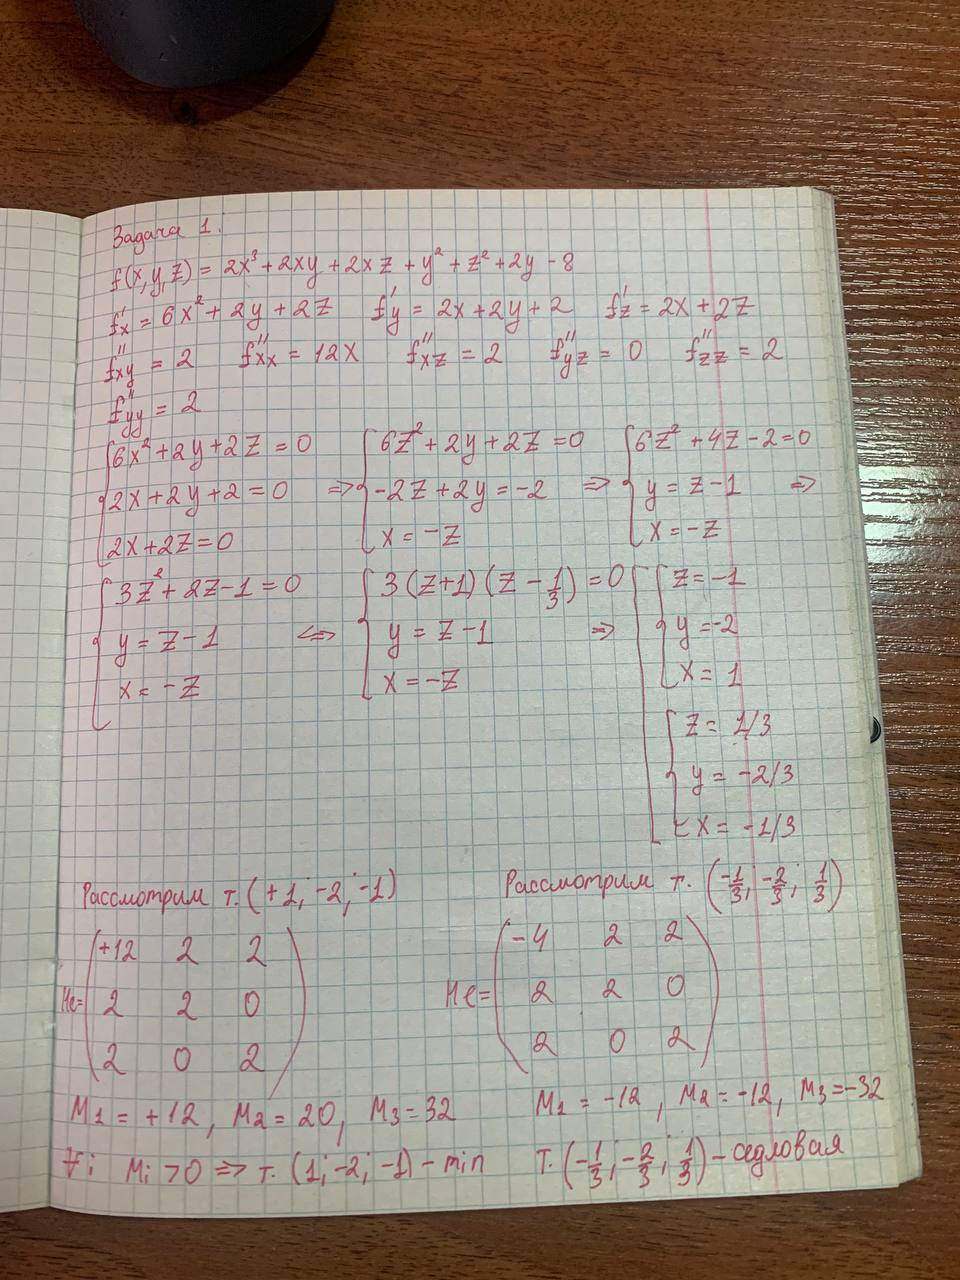

In [21]:
from sympy import diff, pprint, hessian, symbols, solve

x, y, z = symbols('x y z')

f = 2*x**3 + 2*x*y + 2*x*z + y**2 + z**2 + 2*y - 8

f_x = diff(f, x)
f_y = diff(f, y)
f_z = diff(f, z)

critical_points = solve([f_x, f_y, f_z], (x, y, z))

H = hessian(f, (x, y, z))

print("Критические точки:")
for point in critical_points:
    print(point)

for point in critical_points:
    print("\nМатрица Гессиана для точки:", point)
    pprint(H.subs({x: point[0], y: point[1], z: point[2]}))
    H_at_point = H.subs({x: point[0], y: point[1], z: point[2]})
    det_H = H_at_point.det()
    
    eigenvalues = H_at_point.eigenvals()
    
    if all(ev > 0 for ev in eigenvalues):
        print(f"Точка {point} - минимум.")
    elif all(ev < 0 for ev in eigenvalues):
        print(f"Точка {point} - максимум.")
    else:
        print(f"Точка {point} - седловая.")


Критические точки:
(-1/3, -2/3, 1/3)
(1, -2, -1)

Матрица Гессиана для точки: (-1/3, -2/3, 1/3)
⎡-4  2  2⎤
⎢        ⎥
⎢2   2  0⎥
⎢        ⎥
⎣2   0  2⎦
Точка (-1/3, -2/3, 1/3) - седловая.

Матрица Гессиана для точки: (1, -2, -1)
⎡12  2  2⎤
⎢        ⎥
⎢2   2  0⎥
⎢        ⎥
⎣2   0  2⎦
Точка (1, -2, -1) - минимум.


**Задача 2** (25 баллов)

Найдите условные экстремумы функции:

$$
f(x, y)=4 x+8 y, y^2-2 x y+5=0
$$

Вычислите результат самостоятельно (вручную) и с помощью Python. Сравните результаты.

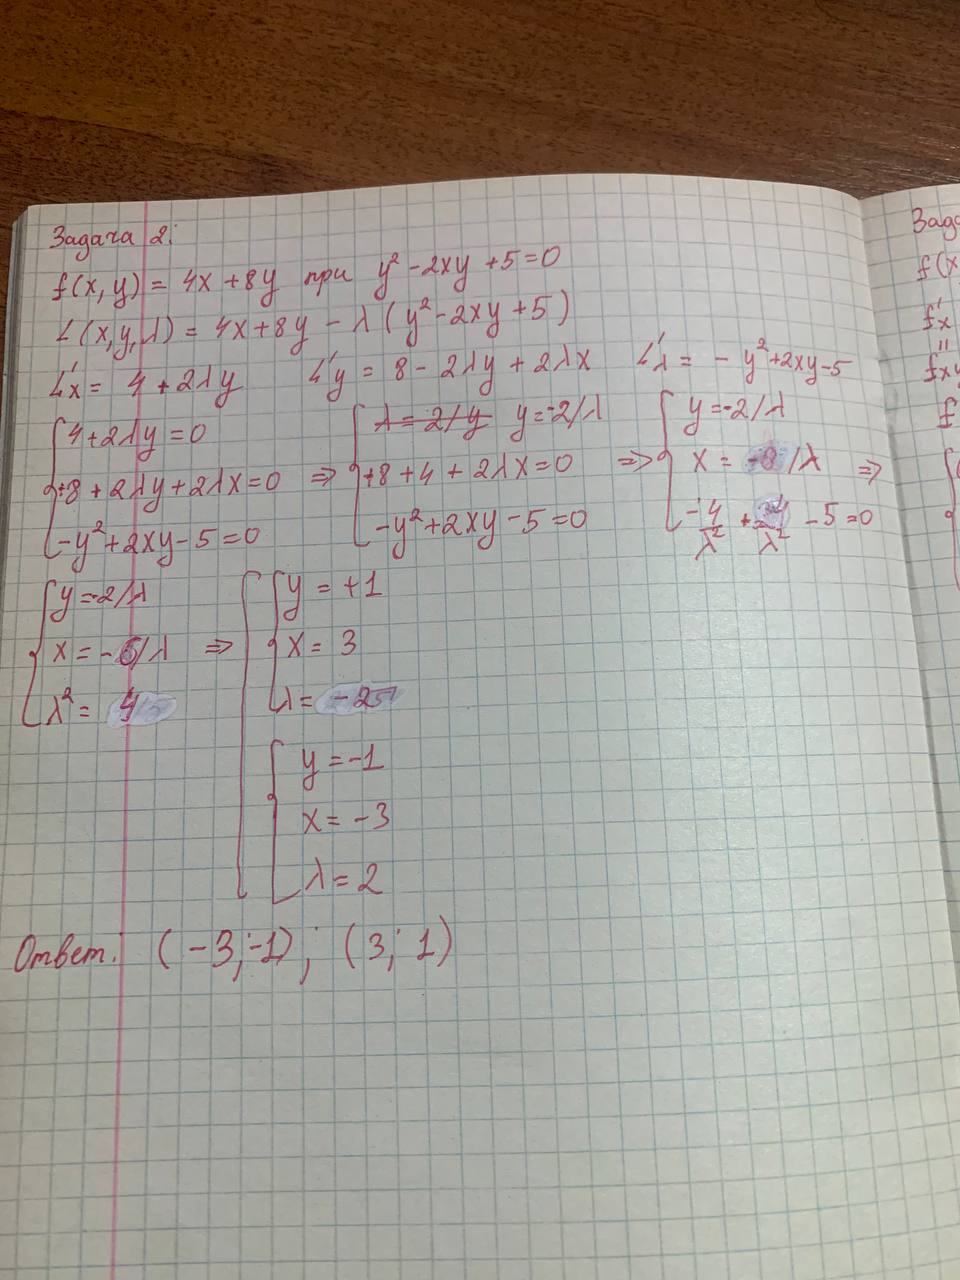

In [49]:
from sympy import symbols, diff, Matrix, pprint, solve

x, y, λ = symbols('x y λ')
f = 4*x + 8*y
g = y**2 - 2*x*y + 5
L = f - λ * g

dL_dx = diff(L, x)
dL_dy = diff(L, y)
dL_dλ = diff(L, λ)

solutions = solve((dL_dx, dL_dy, dL_dλ), (x, y, λ))

for sol in solutions:
    print("Точка экстремума:", (sol[0], sol[1]))
    x_val, y_val, λ_val = sol[0], sol[1], sol[2]
    print(f'Значение функциии {f} в этой точке = {f.subs({x: x_val, y: y_val})}')
    print()


Точка экстремума: (-3, -1)
Значение функциии 4*x + 8*y в этой точке = -20

Точка экстремума: (3, 1)
Значение функциии 4*x + 8*y в этой точке = 20



**Задача 3** (30 баллов)

Вам предложены данные с информацией о успеваемости студентов:

Независимые переменные:
* Hours Studied: Общее количество часов, потраченных на учебу каждым студентом.
* Previous Scores: Баллы, полученные студентами на предыдущих экзаменах.
* Sleep Hours: Среднее количество часов сна студента в сутки.
* Sample Question Papers Practiced: Количество пробных экзаменационных работ, с которыми студент занимался.
  
Целевая переменная:
* Performance Index: Показатель общей успеваемости каждого студента. Индекс успеваемости отражает академическую успеваемость студента и округляется до ближайшего целого числа. Индекс варьируется от 10 до 100, при этом более высокие значения свидетельствуют о более высокой успеваемости.

**Решите задачу линейной регрессии, реализовав градиентный спуск самостоятельно, не используя готовое решение из какой-либо библиотеки.**

In [31]:
import numpy as np
import pandas as pd
import sympy as sp
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [32]:
df = pd.read_csv('Student_Performance.txt', delimiter=',')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [34]:
#Кодируем столбец Extracurricular Activities с помощью OneHotEncoder
encoder = OneHotEncoder()
encoded = encoder.fit_transform(df[['Extracurricular Activities']])
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(['Extracurricular Activities']))
df = pd.concat([df, encoded_df], axis=1)
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
0,7,99,Yes,9,1,91.0,0.0,1.0
1,4,82,No,4,2,65.0,1.0,0.0
2,8,51,Yes,7,2,45.0,0.0,1.0
3,5,52,Yes,5,2,36.0,0.0,1.0
4,7,75,No,8,5,66.0,1.0,0.0
...,...,...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0,0.0,1.0
9996,7,64,Yes,8,5,58.0,0.0,1.0
9997,6,83,Yes,8,5,74.0,0.0,1.0
9998,9,97,Yes,7,0,95.0,0.0,1.0


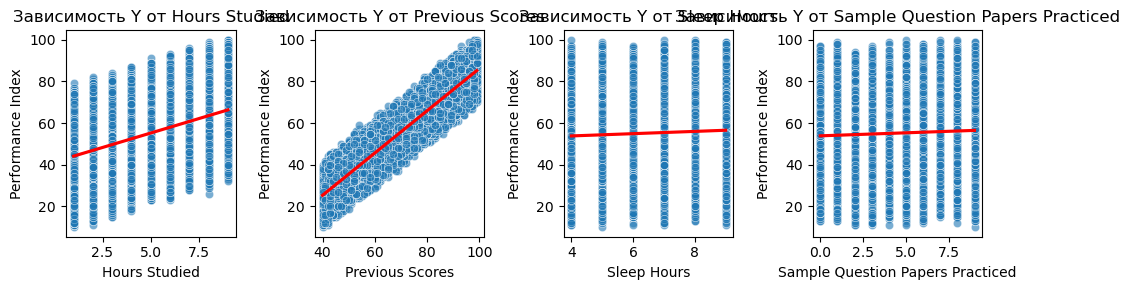

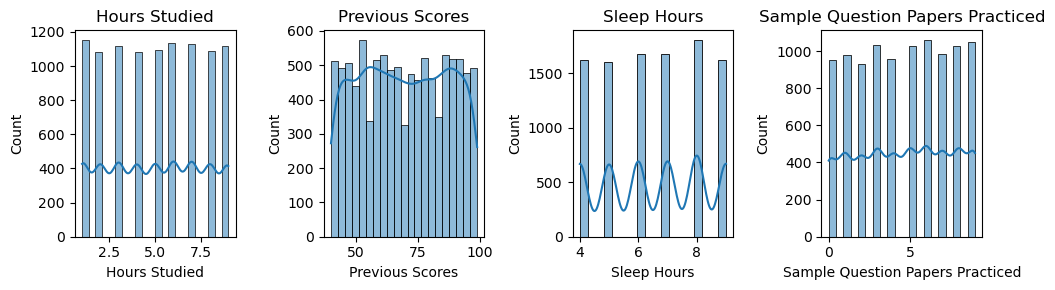

In [ ]:
X = df[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Extracurricular Activities_No', 'Extracurricular Activities_Yes']].values
y = df['Performance Index'].values.reshape(-1, 1)

plt.figure(figsize=(15, 3))
independent_vars = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']
for i, var in enumerate(independent_vars):
    plt.subplot(1, 6, i + 1)
    sns.scatterplot(x=df[var], y=df['Performance Index'], alpha=0.6)
    sns.regplot(x=df[var], y=df['Performance Index'], scatter=False, color='red')
    plt.title(f'Зависимость Y от {var}')
    plt.xlabel(var)
    plt.ylabel('Performance Index')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 3))
for i, column in enumerate(df[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']]):
    plt.subplot(1, 6, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

In [36]:
#Стандартизируем данные
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = np.append(np.ones((len(y), 1)), X, axis=1)

In [37]:
par = np.zeros((X.shape[1], 1))

#Функции потерь
def loss_function(X, y , par):
    y_pred = np.dot(X, par)
    error = (y_pred - y)**2
    cost = 1/(len(y))*np.sum(error)
    return cost

#Градиентный спуск
def grad(X, y, par, alpha, iterations, eps=0.001):
    costs = []
    for i in range(iterations):
        y_pred = np.dot(X, par)
        der = np.dot (X.transpose(), (y_pred - y))
        par -= alpha * 1 / len(y) * der
        costs.append(loss_function(X, y, par))
        if np.linalg.norm(der) <= eps:
            break
    return par, costs

par_opt, costs_opt = grad(X, y, par, 0.00005, 500000)

#MAPE
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

y_pred_opt = np.dot(X, par_opt)
mape_opt = mape(y, y_pred_opt)
r2_opt = r2_score(y, y_pred_opt)

print(f'MAPE: {mape_opt.round(4)}')
print(f'R2: {np.round(r2_opt*100, 4)}')

MAPE: 3.4564
R2: 98.8752


In [38]:
#Сверимся с решением с помощью библиотеки sklearn
model = LinearRegression()
model.fit(X, y)
y_pred_sklearn = model.predict(X)
print(f'MAPE: {mape(y, y_pred_sklearn).round(4)}')
print(f'R2: {np.round(r2_score(y, y_pred_sklearn)*100, 4)}')

MAPE: 3.4564
R2: 98.8752


MAPE: 3.4564%, что говорит о хорошей точности модели  

R2: 98.8752%, то есть 99% результатов модели обьясняется независимыми перменными  

Решение вручную и с помощью библиотеки sklearn дало одинаковый результат